<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#Tratamiento de Datos
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
#Modelado
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import set_config
import multiprocessing
#Advertencias
import warnings
warnings.filterwarnings('ignore')

# Regresion lineal


In [98]:
url = ("Melbourne_housing_extra_data.csv")
datos = pd.read_csv(url, sep=",")
datos=datos.dropna(axis=0)
# datos.head()

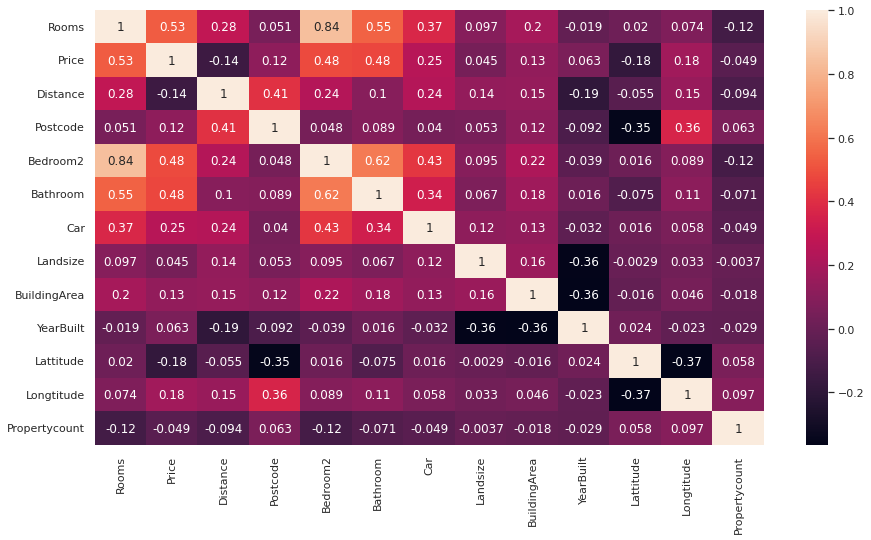

In [104]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(datos.corr(),annot = True)

In [102]:
formula1 = 'Price ~ Rooms'
model1 = sm.ols(formula = formula1, data = datos)
fitted1 = model1.fit()
print(fitted1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     2421.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:17:04   Log-Likelihood:                -88767.
No. Observations:                6050   AIC:                         1.775e+05
Df Residuals:                    6048   BIC:                         1.776e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.546e+04   2.33e+04     -0.664      0.5

# Regresion lineal multiple

In [78]:
datos=datos.drop('Address',axis=1)
datos=datos.drop('Date',axis=1)
datos=datos.dropna(axis=0)
datos.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,3,h,1876000.0,S,Nelson,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,2,h,1636000.0,S,Nelson,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('Price', axis = 'columns'),
                                        datos['Price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [80]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [81]:
#Variables Numéricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [82]:
#Variables Categóricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [83]:
#Preprocesado
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [84]:
set_config(display='text')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Rooms', 'Distance', 'Postcode', 'Bedroom2',
                                  'Bathroom', 'Car', 'Landsize', 'BuildingArea',
                                  'YearBuilt', 'Lattitude', 'Longtitude',
                                  'Propertycount']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Suburb', 'Type', 'Method', 'SellerG',
                                  'CouncilArea', 'Regionname'])])

In [85]:
#Se aplica el preprocesamiento a las variables
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [87]:
encoded_cat

array(['Suburb_Abbotsford', 'Suburb_Aberfeldie', 'Suburb_Airport West',
       'Suburb_Albert Park', 'Suburb_Albion', 'Suburb_Alphington',
       'Suburb_Altona', 'Suburb_Altona Meadows', 'Suburb_Altona North',
       'Suburb_Armadale', 'Suburb_Ascot Vale', 'Suburb_Ashburton',
       'Suburb_Ashwood', 'Suburb_Aspendale', 'Suburb_Avondale Heights',
       'Suburb_Balaclava', 'Suburb_Balwyn', 'Suburb_Balwyn North',
       'Suburb_Bayswater', 'Suburb_Bayswater North',
       'Suburb_Beaconsfield Upper', 'Suburb_Beaumaris',
       'Suburb_Bellfield', 'Suburb_Bentleigh', 'Suburb_Bentleigh East',
       'Suburb_Berwick', 'Suburb_Black Rock', 'Suburb_Blackburn',
       'Suburb_Blackburn North', 'Suburb_Blackburn South',
       'Suburb_Boronia', 'Suburb_Box Hill', 'Suburb_Braybrook',
       'Suburb_Briar Hill', 'Suburb_Brighton', 'Suburb_Brighton East',
       'Suburb_Broadmeadows', 'Suburb_Brooklyn', 'Suburb_Brunswick',
       'Suburb_Brunswick East', 'Suburb_Brunswick West', 'Suburb_Bulleen'

In [86]:
#Se construye el DataFrame
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

ValueError: ignored